<a href="https://colab.research.google.com/github/Bhagyashree-Bhattacharyya/Statistics/blob/main/EDAprojects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Crimes in Boston City***

In [ ]:
!wget https://www.dropbox.com/s/cmtq2ukieeye3oy/Boston_crime.csv

--2023-05-29 16:17:59--  https://www.dropbox.com/s/cmtq2ukieeye3oy/Boston_crime.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/cmtq2ukieeye3oy/Boston_crime.csv [following]
--2023-05-29 16:17:59--  https://www.dropbox.com/s/raw/cmtq2ukieeye3oy/Boston_crime.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc57e914069e3e955c1b298b43a4.dl.dropboxusercontent.com/cd/0/inline/B885_XUjixKupzUW6pgKCBmNNedmodswYfRvIEz4pQHbRnRSnviEpvTtejqbGRLjfvZndcbk7Olq6u7gkSCR04dg9BjXyh1zNF_-u2uy3YKOivZJaFnqPCwN2eFAx_yieU09apBIS7OY0gWTyo7cME2pLOICYzdqyy4g8SD9PnI7jw/file# [following]
--2023-05-29 16:18:00--  https://uc57e914069e3e955c1b298b43a4.dl.dropboxusercontent.com/cd/0/inline/B885_XUjixKupzUW6pgKCBmNNedmodswYfRvIEz4pQHbRnRSnviEpvTtejqbGRLjfvZn

In [ ]:
df1 = pd.read_csv("Boston_crime.csv", encoding='latin-1')
df1.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2020,4,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2020,4,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2020,4,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2020,4,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2020,4,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
df1['YEAR'].unique()

array([2020, 2019, 2018, 2016])

In [ ]:
df1.shape

(319073, 16)

Let's not consider the beginning & ending year as they may content missing values, will take into account the 'Part One' crime only

In [ ]:
df1 = df1.loc[df1['YEAR'].isin([2018,2019])]
df1 = df1.loc[df1['UCR_PART'] == 'Part One']
df1.shape

(37538, 16)

In [ ]:
df1.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [ ]:
df1['DAY_OF_WEEK'] = pd.Categorical(df1['DAY_OF_WEEK'], categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'],
                                   ordered=True)
df1.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5633,I182064766,617,Larceny,LARCENY THEFT FROM BUILDING,E5,729,NaN,2019,10,Monday,13,Part One,VFW PKWY,42.285370,-71.172440,"(42.28536992, -71.17244016)"
5919,I182064449,706,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,NaN,2019,3,Wednesday,9,Part One,AUSTIN ST,42.257688,-71.126418,"(42.25768764, -71.12641770)"
6940,I182063310,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,774,NaN,2019,3,Thursday,12,Part One,COMMONWEALTH AVE,42.338363,-71.154410,"(42.33836272, -71.15441001)"
12370,I182057388,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E13,571,NaN,2019,11,Tuesday,21,Part One,SYLVIA ST,42.310559,-71.102854,"(42.31055889, -71.10285400)"
14227,I182055406,617,Larceny,LARCENY THEFT FROM BUILDING,D4,136,NaN,2019,12,Friday,16,Part One,MARLBOROUGH ST,42.352569,-71.079788,"(42.35256908, -71.07978844)"


In [ ]:
df1.dtypes

INCIDENT_NUMBER          object
OFFENSE_CODE              int64
OFFENSE_CODE_GROUP       object
OFFENSE_DESCRIPTION      object
DISTRICT                 object
REPORTING_AREA           object
SHOOTING                 object
YEAR                      int64
MONTH                     int64
DAY_OF_WEEK            category
HOUR                      int64
UCR_PART                 object
STREET                   object
Lat                     float64
Long                    float64
Location                 object
dtype: object

In [ ]:
df1.drop(columns=['INCIDENT_NUMBER','OFFENSE_CODE'],inplace=True)
df1.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5633,Larceny,LARCENY THEFT FROM BUILDING,E5,729,NaN,2019,10,Monday,13,Part One,VFW PKWY,42.285370,-71.172440,"(42.28536992, -71.17244016)"
5919,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,NaN,2019,3,Wednesday,9,Part One,AUSTIN ST,42.257688,-71.126418,"(42.25768764, -71.12641770)"
6940,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,774,NaN,2019,3,Thursday,12,Part One,COMMONWEALTH AVE,42.338363,-71.154410,"(42.33836272, -71.15441001)"
12370,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E13,571,NaN,2019,11,Tuesday,21,Part One,SYLVIA ST,42.310559,-71.102854,"(42.31055889, -71.10285400)"
14227,Larceny,LARCENY THEFT FROM BUILDING,D4,136,NaN,2019,12,Friday,16,Part One,MARLBOROUGH ST,42.352569,-71.079788,"(42.35256908, -71.07978844)"


*Visualizing the Serious Crimes*

In [ ]:
df1['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Auto Theft', 'Residential Burglary',
       'Larceny From Motor Vehicle', 'Aggravated Assault', 'Robbery',
       'Other Burglary', 'Commercial Burglary', 'Homicide'], dtype=object)

In [ ]:
df1['OFFENSE_CODE_GROUP'].value_counts().index

Index(['Larceny', 'Larceny From Motor Vehicle', 'Aggravated Assault',
       'Residential Burglary', 'Auto Theft', 'Robbery', 'Commercial Burglary',
       'Other Burglary', 'Homicide'],
      dtype='object')

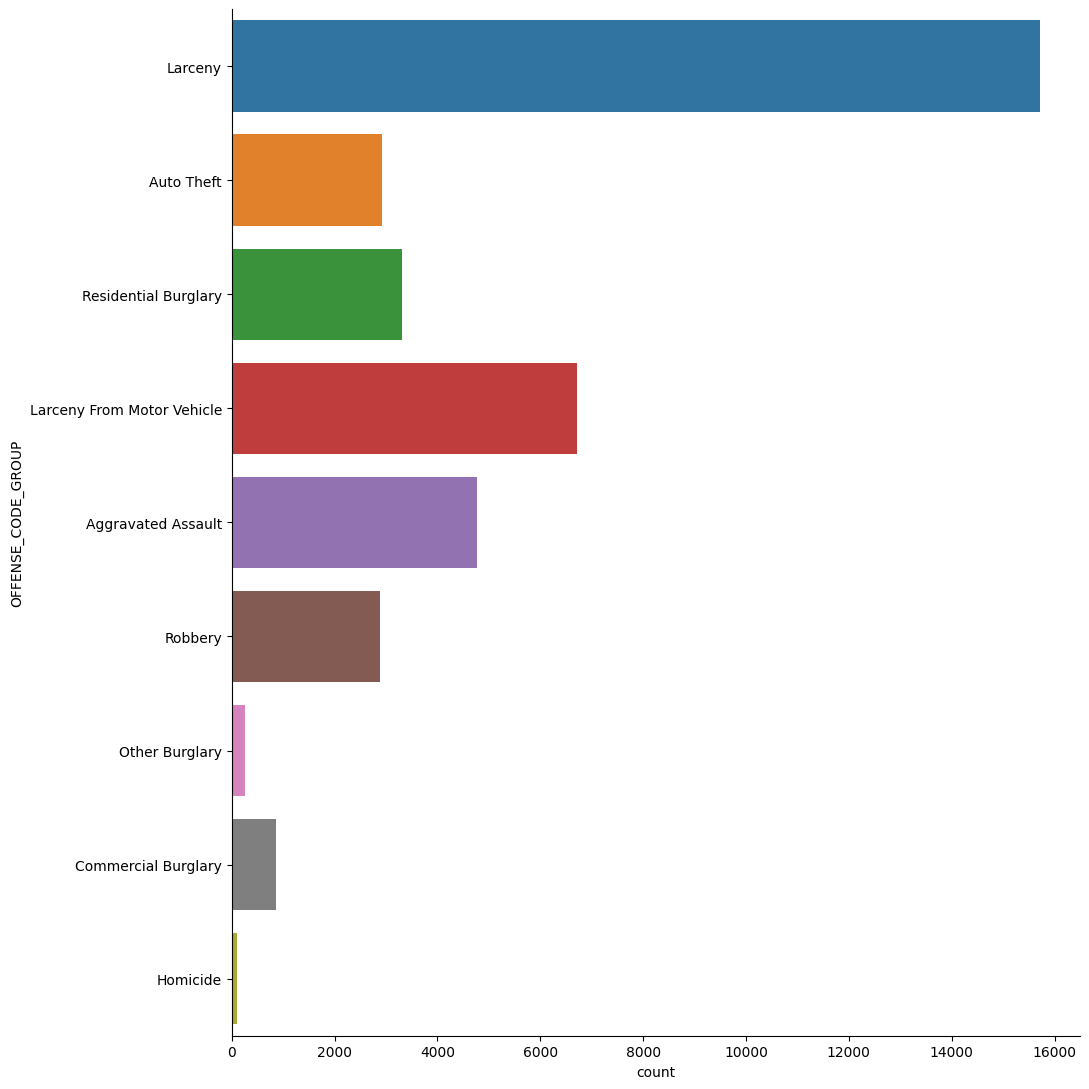

In [ ]:
sns.catplot(y='OFFENSE_CODE_GROUP',
            kind='count',
            height=11,
            aspect=1.0,
            order = df1['OFFENSE_CODE_GROUP'].unique(),
            data=df1)
plt.show()

*Occurance of Serious crime by hour*

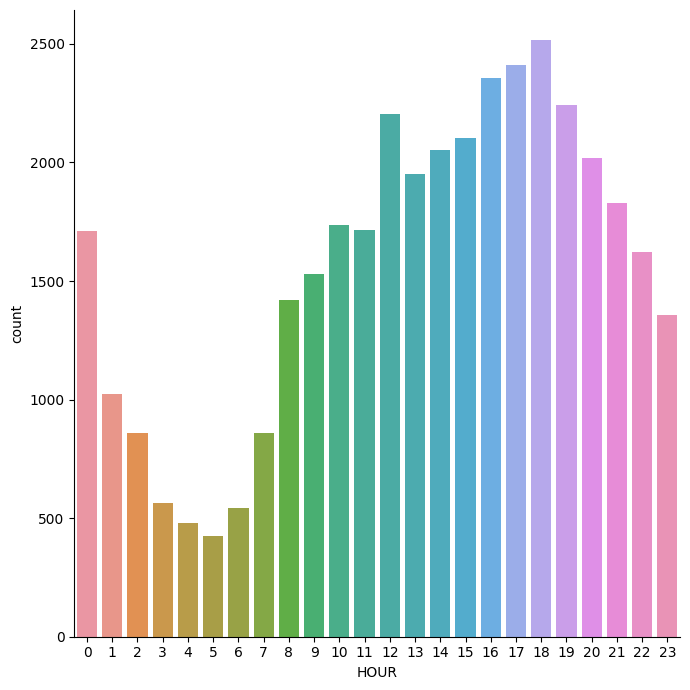

In [ ]:
sns.catplot(x='HOUR',
            kind='count',
            height=7,
            aspect=1.0,
            data=df1)
plt.show()

*Occurrence of Serious Crime by day of the week*

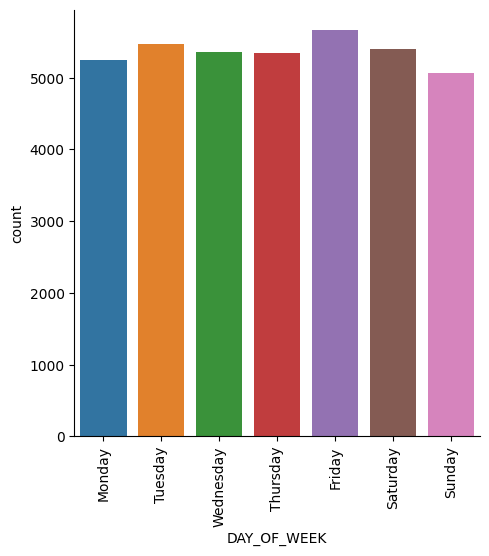

In [ ]:
sns.catplot(x='DAY_OF_WEEK',
            kind='count',
            height=5,
            aspect=1.0,
            data=df1)
plt.xticks(rotation=90)
plt.show()

***PUBG Game data Analysis***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Place the Google Drive Sharing link
file_share_link = "https://drive.google.com/file/d/1rtFoGsbmr2pw2BKKjKzmVbtD9nZiHCnR/view?usp=sharing"

# extract the ID of the file
file_id = file_share_link[file_share_link.find("d/")+2 : file_share_link.find("/v")]
print(file_id)
!gdown "$file_id" # Download the data from Google Drive

1rtFoGsbmr2pw2BKKjKzmVbtD9nZiHCnR
Downloading...
From: https://drive.google.com/uc?id=1rtFoGsbmr2pw2BKKjKzmVbtD9nZiHCnR
To: /content/PUBG.csv
100% 660M/660M [00:08<00:00, 80.1MB/s]


In [ ]:
df2 = pd.read_csv("PUBG.csv")
df2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


Average kills per person

In [ ]:
df2['kills'].mean()

0.9247833241810259

Visualize kill count

In [ ]:
df2['kills'].quantile(0.8) # 80% of people has 2 or less than 2 kills

2.0

In [ ]:
df2['kills'].max()

72

In [ ]:
df2['kills'].quantile(0.99)

7.0

Group players based on number of kills

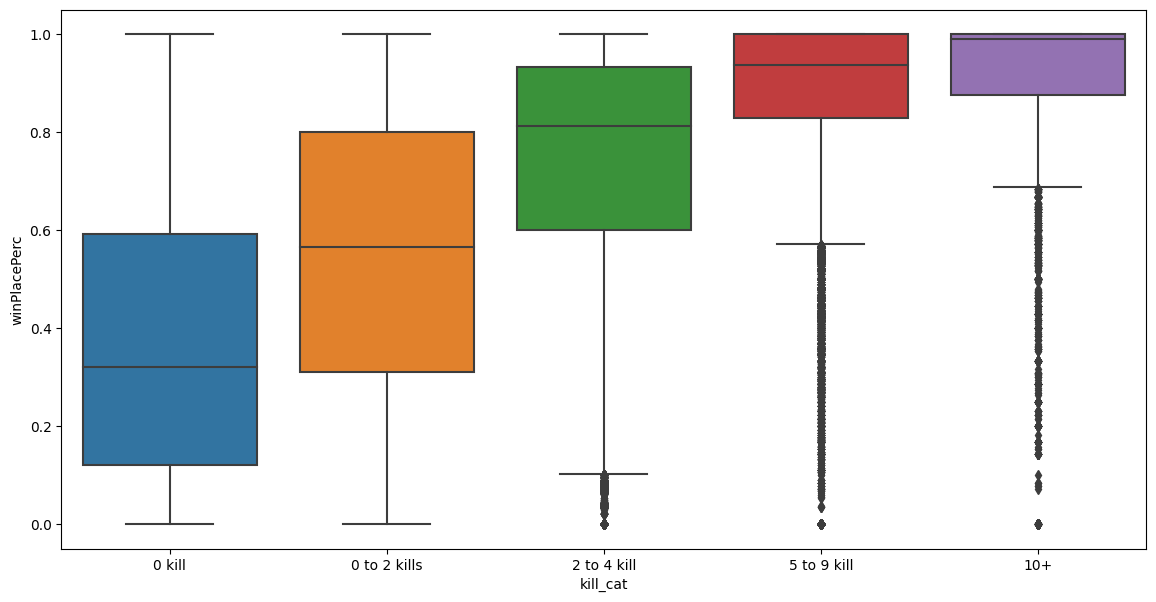

In [ ]:
kills = df2.copy()
kills['kill_cat'] = pd.cut(x = kills['kills'], bins = [-1,0,2,5,10,60], labels = ['0 kill','0 to 2 kills','2 to 4 kill','5 to 9 kill','10+'])
plt.figure(figsize=(14,7))
sns.boxplot(x = 'kill_cat', y = 'winPlacePerc', data=kills)
plt.show()